Optimal number of clusters

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/CRM/Homework 06/cust_data.csv"
data = pd.read_csv(data_path)
data.head()

,Unnamed: 0,cust_id,total_spend,total_visit,avg_weekly_visit,avg_weekly_spend,avg_basket_size,total_quantity
0,0,CUST0000583261,529.38,23.0,1.095238,25.208571,23.016522,282
1,1,CUST0000537317,1805.39,153.0,1.779070,20.992907,11.799935,1280
2,2,CUST0000472158,3600.86,392.0,3.408696,31.311826,9.185867,3060
3,3,CUST0000099658,4874.18,284.0,2.535714,43.519464,17.162606,3832
4,4,CUST0000128681,455.28,24.0,1.142857,21.680000,18.970000,280


In [27]:
from sklearn import preprocessing

In [16]:
X = data.iloc[:, 2:]
X.head()

,total_spend,total_visit,avg_weekly_visit,avg_weekly_spend,avg_basket_size,total_quantity
0,529.38,23.0,1.095238,25.208571,23.016522,282
1,1805.39,153.0,1.779070,20.992907,11.799935,1280
2,3600.86,392.0,3.408696,31.311826,9.185867,3060
3,4874.18,284.0,2.535714,43.519464,17.162606,3832
4,455.28,24.0,1.142857,21.680000,18.970000,280


In [28]:
X.columns

Index(['total_spend', 'total_visit', 'avg_weekly_visit', 'avg_weekly_spend',
       'avg_basket_size', 'total_quantity'],
      dtype='object')

In [39]:
cols=['total_spend', 'total_visit', 'avg_weekly_visit', 'avg_weekly_spend','avg_basket_size', 'total_quantity']
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(X) # calc z-score
z[:5].round(4) # 2D numpy array

X=pd.DataFrame(z, columns=cols) ## power transformation (preferable)
X.head()

,total_spend,total_visit,avg_weekly_visit,avg_weekly_spend,avg_basket_size,total_quantity
0,1.347949,1.229050,0.496739,1.189309,1.256804,1.241050
1,1.725941,1.749598,1.965112,1.031436,0.672466,1.687097
2,1.913520,1.869099,2.014481,1.375665,0.450958,1.893816
3,1.990588,1.834717,2.011987,1.656581,1.001983,1.942069
4,1.297201,1.246969,0.858540,1.059248,1.089321,1.238652


In [40]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 14450.373984270365],
 [3, 9455.32144169352],
 [4, 7770.005327324068],
 [5, 6339.04144369053],
 [6, 5509.61004894543],
 [7, 4884.728404383332],
 [8, 4372.043118782543],
 [9, 3952.9538159665435]]

In [41]:
xy=np.array(ssd)
print(xy)

[[2.00000000e+00 1.44503740e+04]
 [3.00000000e+00 9.45532144e+03]
 [4.00000000e+00 7.77000533e+03]
 [5.00000000e+00 6.33904144e+03]
 [6.00000000e+00 5.50961005e+03]
 [7.00000000e+00 4.88472840e+03]
 [8.00000000e+00 4.37204312e+03]
 [9.00000000e+00 3.95295382e+03]]


In [42]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,14450.373984
1,3,9455.321442
2,4,7770.005327
3,5,6339.041444
4,6,5509.610049
5,7,4884.728404
6,8,4372.043119
7,9,3952.953816


In [43]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,14450.373984,NaN
1,3,9455.321442,-34.566943
2,4,7770.005327,-17.823996
3,5,6339.041444,-18.416511
4,6,5509.610049,-13.084492
5,7,4884.728404,-11.341667
6,8,4372.043119,-10.495676
7,9,3952.953816,-9.585663


Elbow method

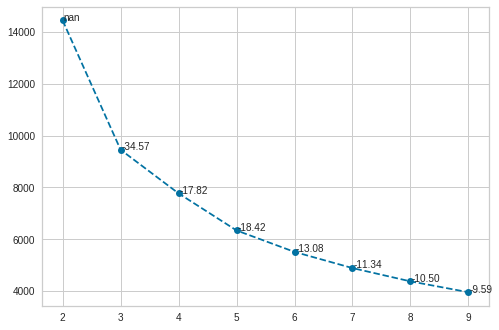

In [44]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

Sihouette score
https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

In [46]:
def sil_score(X, from_k=2, to_k=6):
    '''
    calculate silhouette score for k clusters
    '''
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
#         Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, m.labels_)
#         print(sample_silhouette_values)
#     return max(sils)[1]
    return sils

In [47]:
ss=sil_score(X, 2, 5)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.4571, 2], [0.4319, 3], [0.3742, 4], [0.3717, 5]]
optimal number of clusters = 2


In [48]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

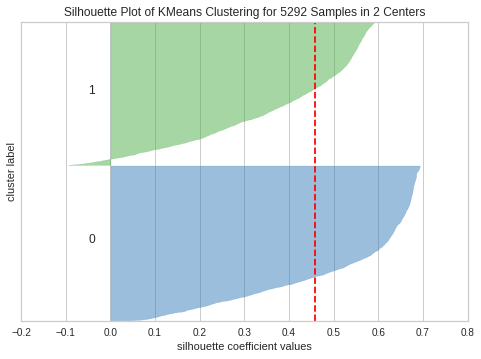

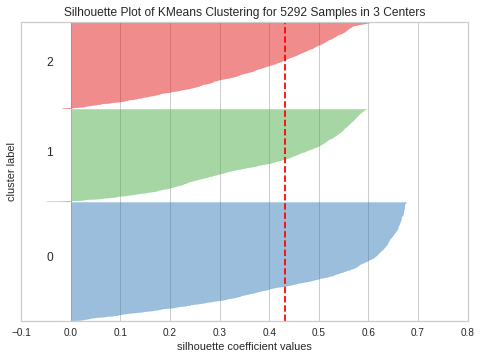

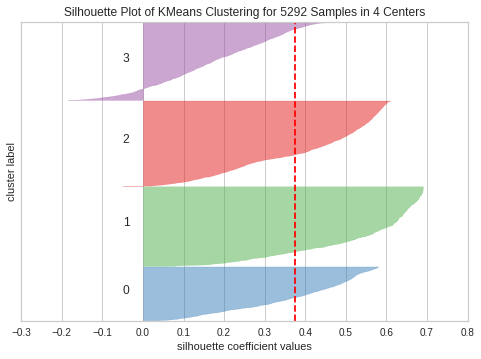

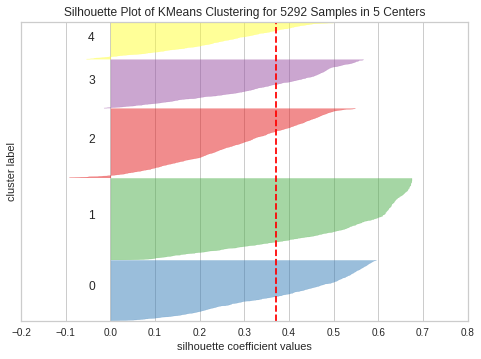

In [49]:
scores=silhouette_plot(X, 2, 5)